In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [67]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [68]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [70]:
Y_train

array([7, 7, 2, ..., 3, 1, 7])

In [84]:
def init_params():
    W1 = np.random.rand(10,784) -0.5
    b1 = np.random.rand(10, 1) -0.5 
    W2 = np.random.rand(10,10)- 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop (W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU (Z):
    return Z>0

def back_prop (Z1,A1,Z2,A2,W1,W2,X,Y):
    m=Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2
    
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [85]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent (X,Y, iterations, alpha):
    W1,b1,W2,b2 = init_params()
    for i in range (iterations):
        Z1, A1, Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print ("Iteration:", i)
            predictions = get_predictions(A2)
            print ("Accuracy:", get_accuracy(predictions, Y))
    return W1,b1,W2,b2

In [86]:
W1,b1,W2,b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration: 0
[8 4 4 ... 6 7 7] [7 7 2 ... 3 1 7]
Accuracy: 0.07470731707317073
Iteration: 50
[9 4 3 ... 3 3 3] [7 7 2 ... 3 1 7]
Accuracy: 0.2879512195121951
Iteration: 100
[7 1 3 ... 3 1 7] [7 7 2 ... 3 1 7]
Accuracy: 0.5469756097560976
Iteration: 150
[7 1 2 ... 3 1 7] [7 7 2 ... 3 1 7]
Accuracy: 0.6830487804878049
Iteration: 200
[7 1 2 ... 3 1 7] [7 7 2 ... 3 1 7]
Accuracy: 0.743
Iteration: 250
[7 1 2 ... 3 1 7] [7 7 2 ... 3 1 7]
Accuracy: 0.7741951219512195
Iteration: 300
[7 1 2 ... 3 1 7] [7 7 2 ... 3 1 7]
Accuracy: 0.7955121951219513
Iteration: 350
[7 1 2 ... 3 1 7] [7 7 2 ... 3 1 7]
Accuracy: 0.8109268292682927
Iteration: 400
[7 1 2 ... 3 1 7] [7 7 2 ... 3 1 7]
Accuracy: 0.8242926829268292
Iteration: 450
[7 1 2 ... 3 1 7] [7 7 2 ... 3 1 7]
Accuracy: 0.8351219512195122


In [87]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

NameError: name 'Y' is not defined

Prediction:  [3]
Label:  3


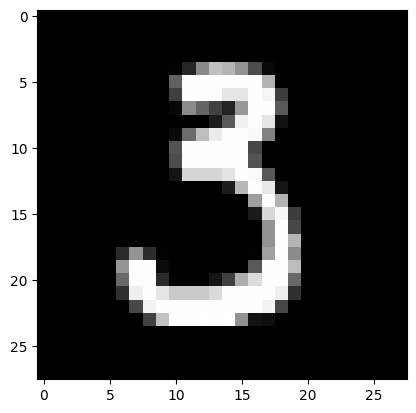

In [94]:
test_prediction(4, W1, b1, W2, b2)

In [95]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 7 1 8 6 1 5 1 8 6 5 8 5 2 0 8 5 7 7 8 6 5 1 1 3 4 2 4 6 8 5 4 3 7 2 5 7
 6 2 7 2 7 9 7 3 3 0 0 0 8 8 5 3 8 0 0 0 9 3 7 6 3 9 3 8 1 9 9 6 0 7 6 8 6
 7 6 3 3 7 8 9 4 9 3 4 9 5 8 2 5 6 0 3 7 2 8 7 5 6 1 6 0 0 1 7 2 3 4 9 2 1
 7 9 9 9 7 1 4 4 7 3 4 7 8 5 3 4 7 7 6 5 1 9 4 6 5 3 7 4 4 0 5 3 2 7 9 6 9
 7 6 7 8 6 9 7 6 9 4 1 2 1 0 2 1 9 0 3 7 4 6 2 1 1 2 3 2 8 6 3 3 6 5 0 3 7
 1 3 2 8 8 2 8 1 4 8 1 7 1 2 5 8 7 6 2 4 8 2 7 7 6 7 5 0 9 4 9 3 8 1 9 0 0
 7 1 8 5 2 8 9 4 5 0 2 3 1 9 8 0 9 1 9 2 0 0 2 8 8 7 3 8 1 6 0 1 9 8 6 4 8
 6 7 0 6 9 4 1 2 6 9 4 2 2 1 4 2 3 1 9 9 9 8 1 9 5 3 6 4 8 7 5 6 4 5 9 9 3
 4 6 9 1 3 6 9 5 4 2 4 0 6 1 4 7 8 3 4 9 6 9 8 7 2 0 7 8 7 6 2 4 1 0 9 4 7
 6 6 4 6 8 8 0 2 5 4 2 3 0 9 2 2 0 9 2 9 5 9 1 4 8 2 3 8 0 1 9 4 1 9 0 4 3
 1 3 0 5 0 9 3 9 1 4 4 7 2 7 4 5 8 2 6 5 5 5 9 1 7 8 3 3 9 6 8 3 2 4 5 5 0
 1 0 1 3 3 7 4 1 6 5 3 8 0 7 3 4 8 7 8 1 3 2 5 6 8 4 4 2 0 6 0 9 9 3 0 0 1
 0 3 1 8 7 2 5 3 2 7 7 7 2 9 8 9 2 8 9 0 9 2 1 9 2 7 3 4 7 9 8 5 8 6 9 6 5
 8 6 8 5 1 0 5 2 8 2 6 1 

0.837